In [2]:
#the old one was runnnig slow 


# part 12 Hypothesis Testing Videos and Quiz 

In [144]:
#full import
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
from math import comb

In [145]:
path = r'E:\career\Dataa\udacity\Advanced Data Analysis Nanodegree Program\Data files'
os.chdir(path)

In [143]:
#read 
#df = pd.read_csv("coffee_dataset.csv")

In [22]:
#if avg for all 
# Ho: u <= 70
# H1: u > 70

In order to put this idea to practice, let's do an example. Follow along with the screencast below to see how this works. The video says the average height of coffee drinkers, but it is actually the average height of all individuals in the coffee dataset - some who drink coffee, but some who do not drink coffee.

After you work through the screencast, there is walk through of a second method we might use to choose between the competing hypotheses on the next concept. In this second screencast, you will use the common logic used in hypothesis testing. The video below uses the logic you gained in the earlier confidence interval lesson.



In [48]:
sample_df = df.sample(150)

In [49]:
bootsample = sample_df.sample(150, replace = True)

In [50]:
means = []
for i in range(10000):
    bootsample = sample_df.sample(150, replace = True)
    means.append(bootsample.height.mean())

In [51]:
low, upper = np.percentile(means, 2.5) , np.percentile(means, 97.5)

In [52]:
low, upper = np.percentile(means, (2.5,97.5))

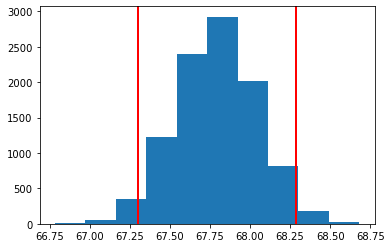

In [53]:
plt.hist(means);
plt.axvline(x=low, color = 'r' , linewidth = 2);
plt.axvline(x=upper, color = 'r' , linewidth = 2);

In [54]:
np.std(means)

0.25260002613791777

In [55]:
null_vals = np.random.normal(70 , np.std(means), 10000)

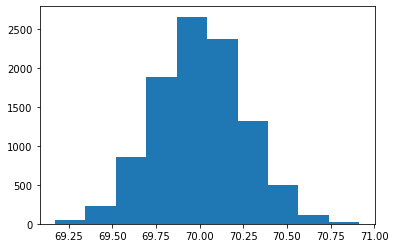

In [56]:
plt.hist(null_vals);

**Some Clarity On The Ending**

At the end of the video, it is suggested that we do not believe that our null hypothesis value of 70 would be supported, which is true. However, since our **null** is that the population mean is less than or equal to **<=70**, we do have evidence to support this **claim** with our **sample mean** of approximately **67**. This would suggest **not rejecting** our one-sided **null alternative**.

If we had a **null** where we asked if the population mean was **equal** to **70**, then we would be able to **reject** this **null** in favor of an **alternative** that suggested the population mean was actually **different** from **70**. You will see more of this idea in the upcoming content.



# Simulating From the Null Hypothesis Quiz 

Load in the data below, and use the exercises to assist with answering the quiz questions below.

`1.` If you were interested in studying whether the average height for coffee drinkers is the **same** as for non-coffee drinkers, what would the null and alternative hypotheses be?  Write them in the cell below, and use your answer to answer the first quiz question below.

**Since there is no directional component associated with this statement, a not equal to seems most reasonable.**

$$H_0: \mu_{coff} - \mu_{no} = 0$$


$$H_1: \mu_{coff} - \mu_{no} \neq 0$$


**$\mu_{coff}$ and $\mu_{no}$ are the population mean values for coffee drinkers and non-coffee drinkers, respectivley.**

`2.` If you were interested in studying whether the average height for coffee drinkers is **less** than non-coffee drinkers, what would the null and alternative be?  Place them in the cell below, and use your answer to answer the second quiz question below.

**In this case, there is a question associated with a direction - that is the average height for coffee drinkers is less than non-coffee drinkers.  Below is one of the ways you could write the null and alternative.  Since the mean for coffee drinkers is listed first here, the alternative would suggest that this is negative.**

$$H_0: \mu_{coff} - \mu_{no} \geq 0$$


$$H_1: \mu_{coff} - \mu_{no} < 0$$


**$\mu_{coff}$ and $\mu_{no}$ are the population mean values for coffee drinkers and non-coffee drinkers, respectivley.**

`3.` For **10,000** iterations: bootstrap the sample data, calculate the **mean** height for coffee drinkers and non-coffee drinkers, and calculate the **difference** in means for each sample.  You will want to have three arrays at the end of the iterations - one for each mean and one for the difference in means.  Use the results of your sampling distribution, to answer the third quiz question below.

In [42]:
np.random.seed(42)

full_data = pd.read_csv('coffee_dataset.csv')
sample_data = full_data.sample(200)

In [43]:
nocoff_meansq, coff_meansq, diffsq = [], [], []

for i in range(10000):
    bootsamp = sample_df.sample(200, replace = True)
    coff_mean = bootsamp[bootsamp['drinks_coffee'] == True]['height'].mean()
    nocoff_mean = bootsamp[bootsamp['drinks_coffee'] == False]['height'].mean()
    # append the info 
    coff_means.append(coff_mean)
    nocoff_means.append(nocoff_mean)
    diffs.append(coff_mean - nocoff_mean)   
    

standard deviation of the sampling distribution for No coffee means: 0.38310389551909796 
standard deviation of the sampling distribution for coffee means: 0.23838669404415921 
standard deviation of the sampling distribution for difference in means: 0.451115273079884


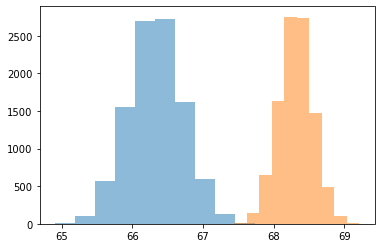

In [44]:
print( 'standard deviation of the sampling distribution for No coffee means:' , np.std(nocoff_meansq) ,
      '\nstandard deviation of the sampling distribution for coffee means:' , np.std(coff_meansq) ,
      '\nstandard deviation of the sampling distribution for difference in means:' , np.std(diffsq)
)
plt.hist(nocoff_meansq, alpha = 0.5);
plt.hist(coff_meansq, alpha = 0.5); # They look pretty normal to me!


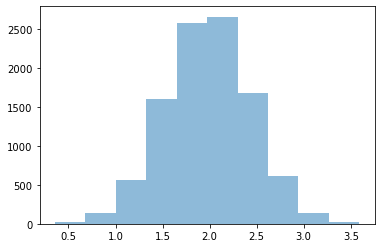

In [45]:
plt.hist(diffsq, alpha = 0.5); # again normal - this is by the central limit theorem

`4.` Now, use your sampling distribution for the difference in means and [the docs](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.normal.html) to simulate what you would expect if your sampling distribution were **centered** on zero.  Also, calculate the **observed** sample mean **difference** in `sample_data`. Use your solutions to answer the last questions in the quiz below.

** We would expect the sampling distribution to be **normal by the Central Limit Theorem**, and we know the **standard deviation** of the sampling distribution of the difference in means from the previous question, so we can use this to simulate draws from the sampling distribution under the null hypothesis.  **If** there is truly **no difference**, then the difference between the means **should be zero**.**

In [46]:
null_valsq = np.random.normal(0, np.std(diffs), 10000) # Here are 10000 draws from the sampling distribution under the null

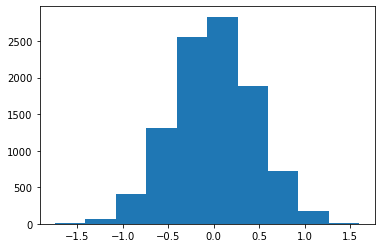

In [47]:
plt.hist(null_valsq); #Here is the sampling distribution of the difference under the null

# Calculating the p-value

1. Simulate the values of your statistic that are possible from the null.
2. Calculate the value of the statistic you actually obtained in your data.
3. Compare your statistic to the values from the null.
4. Calculate the proportion of null values that are considered extreme based on your alternative.


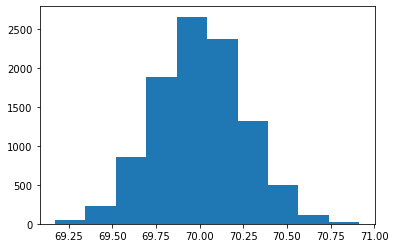

In [57]:
plt.hist(null_vals);

imagine taht we have the alternative to be that
$$\mu > 70$$

In [59]:
sample_mean = sample_df.height.mean()
sample_mean

67.7925931451534

In [61]:
(null_vals > sample_mean).mean()

1.0

large P value (1) suggest we whould not move away from the null 

second example 
$$H_0: \mu \geq 70$$
$$H_1: \mu < 70$$

In [62]:
(null_vals < sample_mean).mean()

0.0

third example 
$$H_0: \mu = 70$$
$$H_1: \mu \neq 70$$

In [73]:
null_mean = 70
(null_vals < sample_mean).mean() + (null_vals > null_mean + (null_mean - sample_mean)).mean()

0.0

# Connecting Errors and P-Values

The p-value is the probability of getting our statistic or a **more extreme** value if the **null** is true.

Therefore, **small p-values** suggest our **null** is **not true**. 
Rather, our statistic is likely to have come from a different distribution than the null.

When the **p-value is large**, we have evidence that our statistic was likely to come from the **null** hypothesis. Therefore, we do not have evidence to reject the null.

By comparing our **p-value** to our **type I error** threshold **(α)**, we can make our decision about which hypothesis we will choose.

$$ pval ≤α⇒ Reject H_0
$$	 

$$pval >α⇒ Fail  to  Reject  H_0$$


The word **accept** is one that is **avoided** when making statements regarding the null and alternative. 
You are not **stating** that one of the hypotheses is **true**. 
Rather, you are making a **decision** based on the **likelihood** of your data coming from the **null hypothesis** with regard to your **type I error threshold**.

Therefore, the wording used in conclusions of **hypothesis testing** includes: **We reject the null hypothesis** or We **fail to reject the null hypothesis**. This lends itself to the idea that you start with the null hypothesis true by default, and "choosing" the null at the end of the test would have been the choice even if no data were collected.

# Calculating Errors quiz

Here are two datasets that represent two of the examples you have seen in this lesson.

One dataset is based on the **parachute** example, and the second is based on the **judicial** example. Neither of these datasets is based on real people.

Use the exercises below to assist in answering the quiz questions at the bottom of this page.

In [5]:
jud_data = pd.read_csv('judicial_dataset_predictions.csv')
par_data = pd.read_csv('parachute_dataset.csv')

In [6]:
jud_data.head()

,defendant_id,actual,predicted
0,22574,innocent,innocent
1,35637,innocent,innocent
2,39919,innocent,innocent
3,29610,guilty,guilty
4,38273,innocent,innocent


In [7]:
par_data.head()

,parachute_id,actual,predicted
0,3956,opens,opens
1,2147,opens,opens
2,2024,opens,opens
3,8325,opens,opens
4,6598,opens,opens


`1.` Above, you can see the actual and predicted columns for each of the datasets.  Using the **jud_data**, find the proportion of errors for the dataset, and furthermore, the percentage of errors of each type.  Use the results to answer the questions in quiz 1 below.

In [30]:
print(
'jud_data errors       :',jud_data[jud_data['actual'] != jud_data['predicted']].shape[0]*100/jud_data.shape[0],
'\njud_data Type I error :',
 (jud_data.query("actual == 'innocent' and predicted == 'guilty'").count()[0]*100/jud_data.shape[0]),
'\njud_data Type II error:',
 jud_data.query("actual == 'guilty' and predicted == 'innocent'").count()[0]*100/jud_data.shape[0],

)

jud_data errors       : 4.21529589454895 
jud_data Type I error : 0.1510366607167376 
jud_data Type II error: 4.064259233832212


If everyone was predicted to be guilty, the percentage of Type I Errors made?

In [20]:
#all innocent people will be type one error 
#Type I "actual == 'innocent'(to get ) and predicted == 'guilty'"(all)
adjust1 = pd.read_csv('judicial_dataset_predictions.csv')
adjust1['predicted'].replace('innocent', 'guilty', inplace = True)
adjust1.query("actual == 'innocent' and predicted == 'guilty'").count()[0]/adjust1.shape[0]

0.45159961554304545

If everyone was predicted to be guilty, the proportion of Type II Errors made?

In [21]:
# Type II "actual == 'guilty' and predicted == 'innocent'(0)"  no over lap there 
#the proportion of Type II Errors made pred innocent, but actual = guilty
adjust2 = pd.read_csv('judicial_dataset_predictions.csv')
adjust2['predicted'].replace('innocent', 'guilty', inplace = True)
adjust2.query("actual == 'guilty' and predicted == 'innocent'").count()[0]/adjust2.shape[0]

0.0

`2.` Above, you can see the actual and predicted columns for each of the datasets.  Using the **par_data**, find the proportion of errors for the dataset, and furthermore, the percentage of errors of each type.  Use the results to answer the questions in quiz 2 below.

In [22]:
print(
'par_data errors       :',par_data[par_data['actual'] != par_data['predicted']].shape[0]/par_data.shape[0],
'\npar_data Type I error :',
 par_data.query("actual != 'opens' and predicted == 'opens'").count()[0]/par_data.shape[0],
'\npar_data Type II error:',
 par_data.query("actual == 'opens' and predicted != 'opens'").count()[0]/par_data.shape[0],

)

par_data errors       : 0.039972551037913875 
par_data Type I error : 0.00017155601303825698 
par_data Type II error: 0.03980099502487562


If every parachute was predicted to not open, the proportion of Type I Errors made?

In [12]:
# Type I errs = pred open , but actual = fails

In [23]:
#all innocent people will be type one error 
#Type I "actual == 'innocent'(to get ) and predicted == 'guilty'"(all)
adjust3 = pd.read_csv('parachute_dataset.csv')
adjust3['predicted'].replace('opens', 'fails', inplace = True)
adjust3.query("actual != 'opens' and predicted == 'opens'").count()[0]/adjust3.shape[0]

0.0

If every parachute was predicted to not open, the proportion of Type II Errors made?

In [24]:
# Type II errs = pred fail , but actual = open
adjust4 = pd.read_csv('parachute_dataset.csv')
adjust4['predicted'].replace('opens', 'fails', inplace = True)
adjust4.query("actual == 'opens' and predicted != 'opens'").count()[0]/adjust4.shape[0]

0.9917653113741637

# The Impact of Large Sample Sizes Quiz 

When we increase our sample size, even the smallest of differences may seem significant.  

To illustrate this point, work through this notebook, and the quiz questions that follow below.

Start by reading in the libraries and data.

In [31]:
np.random.seed(42)

full_data = pd.read_csv('coffee_dataset.csv')

`1.` In this case imagine, we are interested in testing if the mean height of all individuals in the `full_data` is equal to 67.60 inches.  First, use **quiz 1** below to identify the null and alternative hypotheses for these cases. 

$$H_0: \mu = 67.60$$

$$H_1: \mu \neq 67.60$$


`2.` What is the **population mean**?  Create a sample set of data using the below code.  What is the **sample mean?**  What is the **standard deviation** of the **population**?  What is the standard deviation of the **sampling distribution** of the **mean** of **five draws**? Simulate the sampling distribution for the mean of five values to see the shape and plot a **histogram**. Use **quiz 2** below to assure your answers are correct.  

In [39]:
sample1 = full_data.sample(5)
sample1

,user_id,age,drinks_coffee,height
492,6360,<21,False,69.279407
1617,3806,<21,False,65.973235
2820,7968,>=21,True,69.431238
56,5420,<21,False,62.104801
978,4933,>=21,True,70.297037


In [40]:
full_data.height.mean() # Population mean

67.59748697307934

In [41]:
np.std(full_data.height)

3.118908711682146

In [42]:
sample1.height.mean() # Sample mean

67.41714367217155

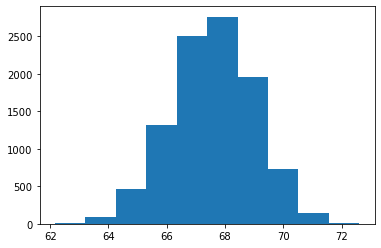

In [43]:
sampling_dist_mean5 = []

for _ in range(10000):
    sample_of_5 = full_data.sample(5)
    sample_mean = sample_of_5.height.mean()
    sampling_dist_mean5.append(sample_mean)
    
plt.hist(sampling_dist_mean5);

In [44]:
std_sampling_dist = np.std(sampling_dist_mean5)
std_sampling_dist# the standard deviation of the sampling distribution

1.407438430265614

`3.` Using your null and alternative hypotheses as set up in question 1 and the results of your sampling distribution in question 2, simulate values of the mean values that you would expect from the null hypothesis.  Use these simulated values to determine a **p-value** to make a decision about your null and alternative hypotheses.  Check your solution using **quiz 3** and **quiz 4** below.

**Hint:** Use the numpy documentation [here](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.normal.html) to assist with your solution.

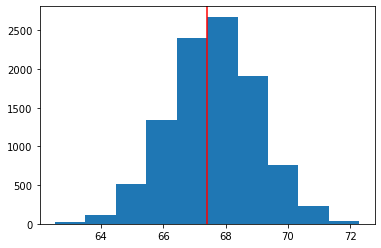

In [45]:
null_mean = 67.60
null_vals = np.random.normal(null_mean, std_sampling_dist, 10000)

plt.hist(null_vals);
plt.axvline(x=sample1.height.mean(), color = 'red'); # where our sample mean falls on null dist

In [46]:
# for a two sided hypothesis, we want to look at anything 
# more extreme from the null in both directions
obs_mean = sample1.height.mean()

# probability of a statistic higher than observed
prob_more_extreme_high = (null_vals > obs_mean).mean()
    
# probability a statistic is more extreme lower
prob_more_extreme_low = (null_mean - (obs_mean - null_mean) < null_vals).mean()

pval = prob_more_extreme_low + prob_more_extreme_high
pval

1.0087

**The above shows a second possible method for obtaining the p-value.  These are pretty different, stability of these values with such a small sample size is an issue. We are essentially shading outside the lines below.**

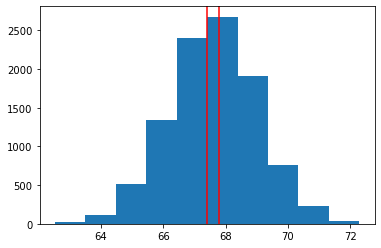

In [47]:
upper_bound = obs_mean
lower_bound = null_mean - (obs_mean - null_mean)

plt.hist(null_vals);
plt.axvline(x=lower_bound, color = 'red'); # where our sample mean falls on null dist
plt.axvline(x=upper_bound, color = 'red'); # where our sample mean falls on null dist

In [48]:
print(upper_bound, lower_bound)

67.41714367217155 67.78285632782844


`4.` Now imagine if you received the same sample mean as you calculated from the sample in question 1 above, but that you actually retrieved it from a **sample of 300**.  What would the new **standard deviation** be for your sampling distribution for the mean of 300 values?  Additionally, what would your new **p-value** be for choosing between the null and alternative hypotheses you set up? Simulate the sampling distribution for the mean of five values to see the shape and plot a histogram.  Use your solutions here to answer the second to last quiz question below.

**Hint:**  If you get stuck, notice you can use the solution from quiz regarding finding the p-value earlier to assist with obtaining this answer with just a few small changes.

* The p-value associated with your hypothesis test.
* The conclusion for your hypothesis at alpha of 0.1 level.
* The standard deviation of the sampling distribution for the mean of 300 draws.
* The value of the sample mean used.

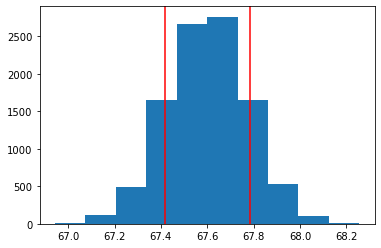

In [49]:
sampling_dist_mean300 = []

for _ in range(10000):
    sample_of_300 = full_data.sample(300)
    sample_mean = sample_of_300.height.mean()
    sampling_dist_mean300.append(sample_mean)
    
std_sampling_dist300 = np.std(sampling_dist_mean300)    
null_vals = np.random.normal(null_mean, std_sampling_dist300, 10000)

plt.hist(null_vals);
plt.axvline(x=lower_bound, color = 'red'); # where our sample mean falls on null dist
plt.axvline(x=upper_bound, color = 'red'); # where our sample mean falls on null dist

In [50]:
# for a two sided hypothesis, we want to look at anything 
# more extreme from the null in both directions

# probability of a statistic lower than observed
prob_more_extreme_low = (null_vals < lower_bound).mean()
    
# probability a statistic is more extreme higher
prob_more_extreme_high = (upper_bound < null_vals).mean()

pval = prob_more_extreme_low + prob_more_extreme_high
pval  # With such a large sample size, our sample mean that is super
      # close will be significant at an alpha = 0.1 level.

1.7086999999999999

In [52]:
np.std(sampling_dist_mean300)

0.17156533170774693

In [55]:
np.mean(sampling_dist_mean300)

67.59789463285946

`5.` Reflect on what happened by answering the final quiz in this concept.

**Even with a very small difference between a sample mean and a hypothesized population mean, the difference will end up being significant with a very large sample size.**

# Multiple Tests Quiz 

In this notebook, you will work with a similar dataset to the judicial dataset you were working with before.  However, instead of working with decisions already being provided, you are provided with a p-value associated with each individual.  

Use the questions in the notebook and the dataset to answer the questions at the bottom of this page.

Here is a glimpse of the data you will be working with:

In [62]:
df = pd.read_csv('judicial_dataset_pvalues.csv')
df.head()

,defendant_id,actual,pvalue
0,22574,innocent,0.294126
1,35637,innocent,0.417981
2,39919,innocent,0.177542
3,29610,guilty,0.015023
4,38273,innocent,0.075371


`1.` Remember back to the null and alternative hypotheses for this example. Use that information to determine the answer for **Quiz 1** and **Quiz 2** below.

**A p-value is the probability of observing your data or more extreme data, if the null is true.  Type I errors are when you choose the alternative when the null is true, and vice-versa for Type II.  Therefore, deciding an individual is guilty when they are actually innocent is a Type I error.  The alpha level is a threshold for the percent of the time you are willing to commit a Type I error.**

`2.` If we consider each individual as a single hypothesis test, find the conservative Bonferroni corrected p-value we should use to maintain a 5% type I error rate.

In [57]:
bonf_alpha = 0.05/df.shape[0]
bonf_alpha

6.86530275985171e-06

`3.` What is the proportion of type I errors made if the correction isn't used?  How about if it is used?  

Use your answers to find the solution to **Quiz 3** below.

**In order to find the number of type I errors made without the correction - we need to find all those that are actually innocent with p-values less than 0.05.**

In [58]:
df.query("actual == 'innocent' and pvalue < 0.05").count()[0]/df.shape[0] # If not used

0.001510366607167376

In [59]:
df.query("actual == 'innocent' and pvalue < @bonf_alpha").count()[0]/df.shape[0] # If used

0.0

`4.` Think about how hypothesis tests can be used, and why this example wouldn't exactly work in terms of being able to use hypothesis testing in this way.  Check your answer with **Quiz 4** below.

**This is looking at individuals, and that is more of the aim for machine learning techniques.  Hypothesis testing and confidence intervals are for population parameters. Therefore, they are not meant to tell us about individual cases, and we wouldn't obtain p-values for individuals in this way. We could get probabilities, but that isn't the same as the probabilities associated with the relationship to sampling distributions as you have seen in these lessons.**

### Multiple Tests

In this notebook, you will work with a similar dataset to the judicial dataset you were working with before.  However, instead of working with decisions already being provided, you are provided with a p-value associated with each individual.  

Use the questions in the notebook and the dataset to answer the questions at the bottom of this page.

Here is a glimpse of the data you will be working with:

import numpy as np
import pandas as pd

df = pd.read_csv('judicial_dataset_pvalues.csv')
df.head()

`1.` Remember back to the null and alternative hypotheses for this example. Use that information to determine the answer for **Quiz 1** and **Quiz 2** below.

**A p-value is the probability of observing your data or more extreme data, if the null is true.  Type I errors are when you choose the alternative when the null is true, and vice-versa for Type II.  Therefore, deciding an individual is guilty when they are actually innocent is a Type I error.  The alpha level is a threshold for the percent of the time you are willing to commit a Type I error.**

`2.` If we consider each individual as a single hypothesis test, find the conservative Bonferroni corrected p-value we should use to maintain a 5% type I error rate.

bonf_alpha = 0.05/df.shape[0]
bonf_alpha

`3.` What is the proportion of type I errors made if the correction isn't used?  How about if it is used?  

Use your answers to find the solution to **Quiz 3** below.

**In order to find the number of type I errors made without the correction - we need to find all those that are actually innocent with p-values less than 0.05.**

df.query("actual == 'innocent' and pvalue < 0.05").count()[0]/df.shape[0] # If not used

df.query("actual == 'innocent' and pvalue < @bonf_alpha").count()[0]/df.shape[0] # If used

`4.` Think about how hypothesis tests can be used, and why this example wouldn't exactly work in terms of being able to use hypothesis testing in this way.  Check your answer with **Quiz 4** below.

**This is looking at individuals, and that is more of the aim for machine learning techniques.  Hypothesis testing and confidence intervals are for population parameters. Therefore, they are not meant to tell us about individual cases, and we wouldn't obtain p-values for individuals in this way. We could get probabilities, but that isn't the same as the probabilities associated with the relationship to sampling distributions as you have seen in these lessons.**

# 13. Case A B tests Videos and quizes

## Homepage Experiment Data Quiz

In [63]:
df = pd.read_csv('homepage_actions.csv')
df.head()

,timestamp,id,group,action
0,2016-09-24 17:42:27.839496,804196,experiment,view
1,2016-09-24 19:19:03.542569,434745,experiment,view
2,2016-09-24 19:36:00.944135,507599,experiment,view
3,2016-09-24 19:59:02.646620,671993,control,view
4,2016-09-24 20:26:14.466886,536734,experiment,view


### 1. Match the following characteristics of this dataset: 
- total number of actions
- number of unique users
- sizes of the control and experiment groups (i.e., the number of unique users in each group)

In [68]:
# total number of actions
#df.groupby('action').count()
df.count()

timestamp    8188
id           8188
group        8188
action       8188
dtype: int64

In [73]:
# number of unique users
df['id'].nunique()

6328

In [75]:
# size of control group and experiment group
df.groupby('group').count()

,timestamp,id,action
group,,,
control,4264,4264,4264
experiment,3924,3924,3924


### 2. How long was the experiment run for? 
Hint: the records in this dataset are ordered by timestamp in increasing order

In [79]:
# duration of this experiment
df.timestamp.max() ,df.timestamp.min()

('2017-01-18 10:24:08.629327', '2016-09-24 17:42:27.839496')

### 3. What action types are recorded in this dataset?
(i.e., What are the unique values in the action column?)

In [80]:
# action types in this experiment
df.groupby('action').count()

,timestamp,id,group
action,,,
click,1860,1860,1860
view,6328,6328,6328


### 4. Why would we use click through rate instead of number of clicks to compare the performances of control and experiment pages?

Answer

### 5. Define the click through rate (CTR) for this experiment.

Answer

### 6. What are the null and alternative hypotheses?
Use $CTR_{old}$ and $CTR_{new}$ in your hypotheses.

$$H_0: $$
$$H_1: $$

## metric click through rate Video

In [125]:
control_df = df.query('group == "control"')
control_ctr = control_df.query('action == "click"').id.nunique() / control_df.query("action == 'view'").id.nunique()
control_ctr 

0.2797118847539016

In [126]:
experiment_df = df.query('group == "experiment"')
experiment_ctr = experiment_df.query('action == "click"').id.nunique() / experiment_df.query("action == 'view'").id.nunique()
experiment_ctr 

0.3097463284379172

In [127]:
obsdiff = experiment_ctr - control_ctr
obsdiff

0.030034443684015644

make sure that it's not lucky one and it's really significant 

In [128]:
diffs = []
for i in range(10000):
    bootsamp = df.sample(df.shape[0], replace = True)
    control_df = bootsamp.query('group == "control"')
    control_ctr = control_df.query('action == "click"').id.nunique() / control_df.query("action == 'view'").id.nunique()
    experiment_df = bootsamp.query('group == "experiment"')
    experiment_ctr = experiment_df.query('action == "click"').id.nunique() / experiment_df.query("action == 'view'").id.nunique()
    diffs.append(experiment_ctr - control_ctr)
    

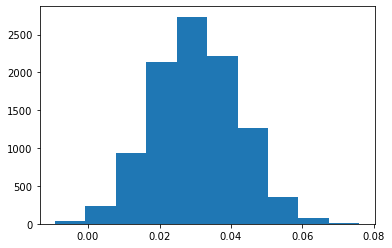

In [129]:
plt.hist(diffs);

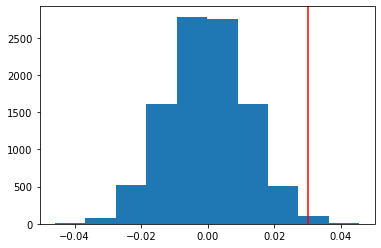

In [130]:
null_vals = np.random.normal(0 , np.std(diffs), len(diffs))
plt.hist(null_vals);
plt.axvline(obsdiff, color = 'red');

In [131]:
p_value = (null_vals > obsdiff).mean()
p_value

0.0055

reject the null is the answer 

## enrollment_rate Quiz 

In [146]:
np.random.seed(42)
df = pd.read_csv('course_page_actions.csv')
df.head()

,timestamp,id,group,action,duration
0,2016-09-24 17:14:52.012145,261869,experiment,view,130.545004
1,2016-09-24 18:45:09.645857,226546,experiment,view,159.862440
2,2016-09-24 19:16:21.002533,286353,experiment,view,79.349315
3,2016-09-24 19:43:06.927785,842279,experiment,view,55.536126
4,2016-09-24 21:08:22.790333,781883,experiment,view,204.322437


In [147]:
# Get dataframe with all records from control group
control_df = df.query('group == "control"')

# Compute click through rate for control group
control_ctr = control_df.query('action == "enroll"').id.nunique() / control_df.query('action == "view"').id.nunique()

# Display click through rate
control_ctr

0.2364438839848676

In [148]:
# Get dataframe with all records from experiment group
experiment_df = df.query('group == "experiment"')

# Compute click through rate for experiment group
experiment_ctr = experiment_df.query('action == "enroll"').id.nunique() / experiment_df.query('action == "view"').id.nunique()

# Display click through rate
experiment_ctr

0.2668693009118541

In [149]:
# Compute the observed difference in click through rates
obs_diff = experiment_ctr - control_ctr

# Display observed difference
obs_diff

0.030425416926986526

In [150]:
# Create a sampling distribution of the difference in proportions
# with bootstrapping
diffs = []
size = df.shape[0]
for _ in range(10000):
    b_samp = df.sample(size, replace=True)
    control_df = b_samp.query('group == "control"')
    experiment_df = b_samp.query('group == "experiment"')
    control_ctr = control_df.query('action == "enroll"').id.nunique() / control_df.query('action == "view"').id.nunique()
    experiment_ctr = experiment_df.query('action == "enroll"').id.nunique() / experiment_df.query('action == "view"').id.nunique()
    diffs.append(experiment_ctr - control_ctr)


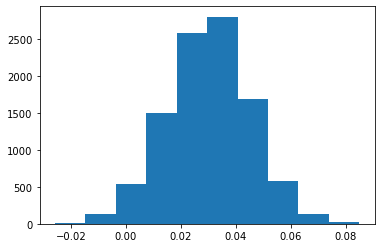

In [153]:
# Convert to numpy array
diffs = np.array(diffs)

# Plot sampling distribution
plt.hist(diffs);

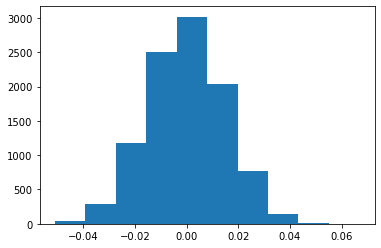

In [155]:
# Simulate distribution under the null hypothesis
null_vals = np.random.normal(0, diffs.std(), diffs.size)

# Plot the null distribution
plt.hist(null_vals);

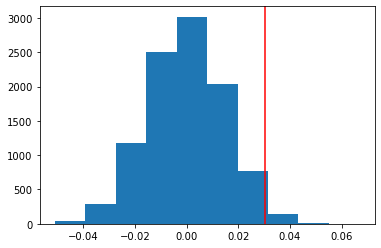

In [156]:
# Plot observed statistic with the null distibution
plt.hist(null_vals);
plt.axvline(obs_diff , color ='red');


In [158]:
# Compute p-value
p_val = (null_vals > obs_diff).mean()
p_val

0.0188

## Average Reading Duration video

In [159]:
df.head()

,timestamp,id,group,action,duration
0,2016-09-24 17:14:52.012145,261869,experiment,view,130.545004
1,2016-09-24 18:45:09.645857,226546,experiment,view,159.862440
2,2016-09-24 19:16:21.002533,286353,experiment,view,79.349315
3,2016-09-24 19:43:06.927785,842279,experiment,view,55.536126
4,2016-09-24 21:08:22.790333,781883,experiment,view,204.322437


In [161]:
# The total_days represents the total amount of time
# each student has spent in classroom.
# get the average classroom time for control group
views = df.query('action == "view"')

control_mean = df.query('group == "control"')['duration'].mean()

# get the average classroom time for experiment group
experiment_mean = df.query('group == "experiment"')['duration'].mean()

# display average classroom time for each group
control_mean, experiment_mean

(115.40710650582048, 130.93220512539497)

In [162]:
# compute observed difference in classroom time
obs_diff = experiment_mean - control_mean
 
# display observed difference
obs_diff

15.525098619574493

In [163]:
# create sampling distribution of difference in average classroom times
# with boostrapping
diffs = []
# plot sampling distribution
plt.hist(diffs);

diffs = np.array(diffs)

# simulate distribution under the null hypothesis
null_vals = np.random.normal(0, diffs.std(), diffs.size)

# Plot the null distribution
plt.hist(null_vals);
# plot line for observed statistic
plt.axvline(obs_diff , color = 'red');

p_val = (null_vals > obs_diff).mean()
p_val

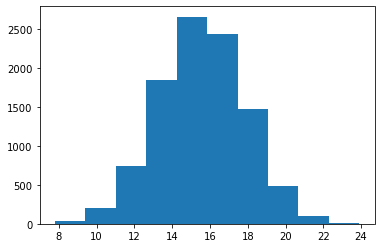

In [164]:
# plot sampling distribution
plt.hist(diffs);

In [167]:
diffs = np.array(diffs)

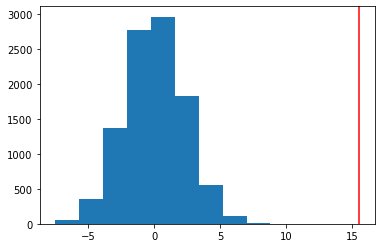

In [172]:
# simulate distribution under the null hypothesis
null_vals = np.random.normal(0, diffs.std(), diffs.size)

# Plot the null distribution
plt.hist(null_vals);
# plot line for observed statistic
plt.axvline(obs_diff , color = 'red');

In [173]:
p_val = (null_vals > obs_diff).mean()
p_val

0.0

now we can drop the null

## Average Reading Duration Quiz

In [175]:
np.random.seed(42)
df = pd.read_csv('classroom_actions.csv')
df.head()

,timestamp,id,group,total_days,completed
0,2015-08-10 17:06:01.032740,610019,experiment,97,True
1,2015-08-10 17:15:28.950975,690224,control,75,False
2,2015-08-10 17:34:40.920384,564994,experiment,128,True
3,2015-08-10 17:50:39.847374,849588,experiment,66,False
4,2015-08-10 19:10:40.650599,849826,experiment,34,False


In [177]:
# The total_days represents the total amount of time
# each student has spent in classroom.
# get the average classroom time for control group
control_mean = df.query('group == "control"').total_days.mean()

# get the average classroom time for experiment group
experiment_mean = df.query('group == "experiment"').total_days.mean()

# display average classroom time for each group
control_mean, experiment_mean

(73.36899038461539, 74.6715935334873)

In [178]:
# compute observed difference in classroom time
obs_diff = experiment_mean - control_mean

# display observed difference
obs_diff

1.3026031488719099

In [179]:
# create sampling distribution of difference in average classroom times
# with boostrapping
diffs = []
for _ in range(10000):
    bsamb = df.sample(df.shape[0], replace = True)
    control_mean = bsamb.query('group == "control"')['total_days'].mean()
    experiment_mean = bsamb.query('group == "experiment"')['total_days'].mean()
    diffs.append(experiment_mean - control_mean)
diffs = np.array(diffs)

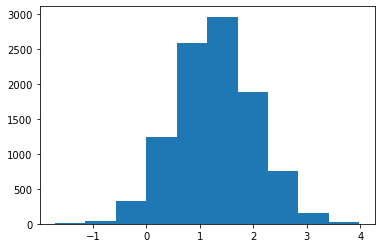

In [180]:
# plot sampling distribution
plt.hist(diffs);

In [181]:
diffs = np.array(diffs)

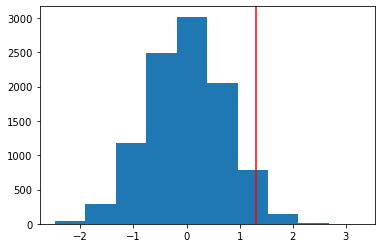

In [182]:
# simulate distribution under the null hypothesis
null_vals = np.random.normal(0, diffs.std(), diffs.size)

# Plot the null distribution
plt.hist(null_vals);
# plot line for observed statistic
plt.axvline(obs_diff , color = 'red');

In [183]:
p_val = (null_vals > obs_diff).mean()
p_val

0.0384

Is this difference practically significant?

**NO** Even if the increase in classroom time is statistically significant, engaging students for 1.3 more days in the classroom, when they average around 74 days in total, doesn't seem to indicate a large enough value to launch this change from a practical perspective for Audacity.

## Completion Rate quiz 

In [184]:
df.head()

,timestamp,id,group,total_days,completed
0,2015-08-10 17:06:01.032740,610019,experiment,97,True
1,2015-08-10 17:15:28.950975,690224,control,75,False
2,2015-08-10 17:34:40.920384,564994,experiment,128,True
3,2015-08-10 17:50:39.847374,849588,experiment,66,False
4,2015-08-10 19:10:40.650599,849826,experiment,34,False


In [188]:
# Create dataframe with all control records

control_df = df.query('group == "control"')

# Compute completion rate
control_cr = control_df['completed'].mean()

# Display completion rate
control_cr

0.3719951923076923

In [189]:
# Create dataframe with all experiment records
experiment_df = df.query('group == "experiment"')

# Compute completion rate
experiment_cr = experiment_df['completed'].mean()

# Display completion rate
experiment_cr

0.3935334872979215

In [190]:
# Compute observed difference in completion rates
obs_diff = experiment_cr - control_cr

# Display observed difference in completion rates
obs_diff

0.02153829499022919

In [191]:
# Create sampling distribution for difference in completion rates
# with boostrapping
diffs = []
size = df.shape[0]
for _ in range(10000):
    b_samp = df.sample(size, replace=True)
    control_df = b_samp.query('group == "control"')
    experiment_df = b_samp.query('group == "experiment"')
    control_ctr = control_df['completed'].mean()
    experiment_ctr = experiment_df['completed'].mean()
    diffs.append(experiment_ctr - control_ctr)

diffs = np.array(diffs)  

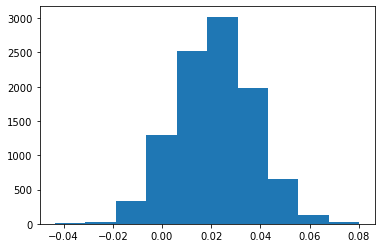

In [192]:
# plot distribution
plt.hist(diffs);

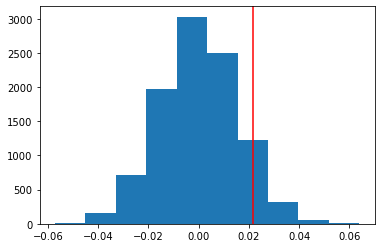

In [193]:
# create distribution under the null hypothesis
null_vals = np.random.normal(0, diffs.std(), diffs.size)
# plot null distribution
plt.hist(null_vals);

# plot line for observed statistic
plt.axvline(obs_diff, c='red');

In [194]:
# compute p value
(null_vals > obs_diff).mean()

0.0821

Do you have evidence, with a type I error rate of 0.05, that this course increases in completion rate when using the experimental description on its course overview page?

Remember if your p-value is less than the alpha level this suggests that there is a statistically significant difference.

**no**

